RESEARCH PROJECT – EMPLOYEE ATTRITION PREDICTION

Name: Devendra Kulkarnk

StudentID: 10575665 (Group-A)

Course Title	Master of Science in Data Analytics (2021-2022)

Assessment Title	Dissertation


**EXPLORATORY DATA ANALYSIS**

In [86]:
import numpy as nmp
import pandas as pnd
import seaborn as sbn
import matplotlib.pyplot as mplt
%matplotlib inline
from pandas import DataFrame
from sklearn import preprocessing
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [88]:
df = pnd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


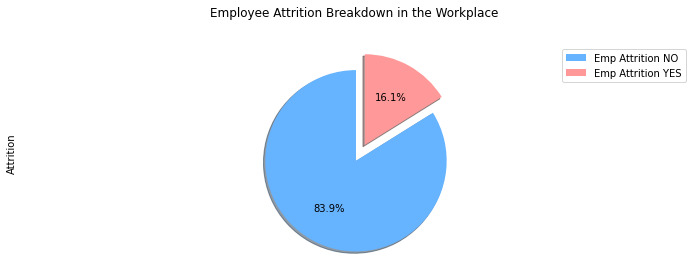

In [89]:
labels = 'Emp Attrition NO','Emp Attrition YES'
df['Attrition'].astype(str).value_counts().plot(kind='pie',
                            figsize=(12, 4),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,  
                            colors = ['#66b3ff','#ff9999'],
                            explode = [0.2, 0]                             
                            )

mplt.title('Employee Attrition Breakdown in the Workplace ', y=1.10) 
mplt.axis('equal') 
# inserting legend
mplt.legend(labels=labels, loc='upper right') 
 # For displaing plot
mplt.show()

In [90]:
# Droping the following unwanted features from the dataset - Over18,EmployeeNumber,StockOptionLevel,StandardHours,EmployeeCount
df = df.drop(columns=['Over18','EmployeeNumber','StockOptionLevel','StandardHours','EmployeeCount'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,3,4,6,3,3,2,2,2,2


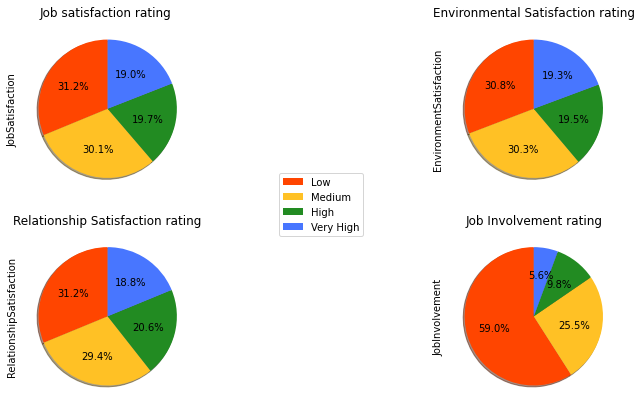

In [91]:
shp = mplt.figure() 
ali1 = shp.add_subplot(221) 
ali2 = shp.add_subplot(222)  
ali3 = shp.add_subplot(223) 
ali4 = shp.add_subplot(224)  

labels = 'Low','Medium','High','Very High'

df['JobSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(14, 7),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,
                            colors = ['#FF4500','#FFC125','#228B22','#4876FF'],    
                            labels=None,ax=ali1) # adding to plot 2

ali1.set_title ('Job satisfaction rating ')
shp.legend(labels=labels,loc='center')

df['EnvironmentSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(14, 7),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,
                            colors = ['#FF4500','#FFC125','#228B22','#4876FF'],       
                            labels=None,ax=ali2) 

ali2.set_title('Environmental Satisfaction rating')

df['RelationshipSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(14, 7),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,
                            colors = ['#FF4500','#FFC125','#228B22','#4876FF'],       
                            labels=None,ax=ali3)

ali3.set_title('Relationship Satisfaction rating')

df['JobInvolvement'].astype(str).value_counts().plot(kind='pie',
                            figsize=(14, 7),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,
                            colors = ['#FF4500','#FFC125','#228B22','#4876FF'],      
                            labels=None,ax=ali4) 

ali4.set_title('Job Involvement rating')

mplt.show()

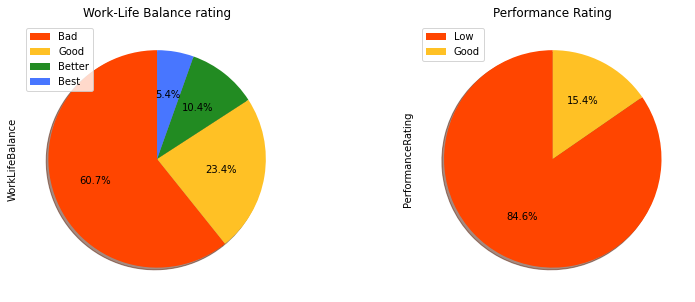

In [92]:
shp2 = mplt.figure() 

ali5 = shp2.add_subplot(121) 
ali6 = shp2.add_subplot(122)  
  
labels_list1 = 'Bad','Good','Better','Best' 
labels_list2 = 'Low','Good','Excellent','Outstanding'

df['WorkLifeBalance'].astype(str).value_counts().plot(kind='pie',
                            figsize=(13, 5),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True, 
                            colors = ['#FF4500','#FFC125','#228B22','#4876FF'],      
                            labels=None,ax=ali5) # It will add to 2nd pie chart
ali5.set_title ('Work-Life Balance rating')
ali5.legend(labels=labels_list1,loc='upper left')

df['PerformanceRating'].astype(str).value_counts().plot(kind='pie',
                            figsize=(13, 5),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,      
                            colors = ['#FF4500','#FFC125','#228B22','#4876FF'], 
                            labels=None,ax=ali6) 
ali6.set_title('Performance Rating')
ali6.legend(labels=labels_list2,loc='upper left')

mplt.show()

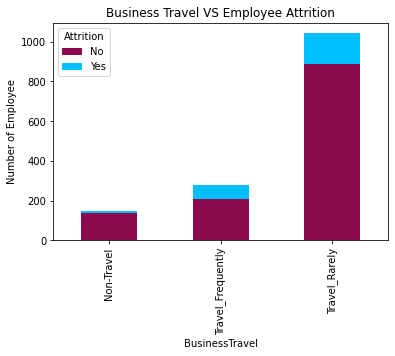

In [93]:
bar1 = df.groupby("BusinessTravel")['Attrition'].value_counts(normalize=False).unstack()

bar1.plot(kind='bar', alpha=1, stacked='False',color=['#8B0A50','#00BFFF'])

mplt.title('Business Travel VS Employee Attrition')
mplt.ylabel('Number of Employee')
mplt.show()

In [94]:
v1 = df[['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalWorkingYears', 'Attrition']]
v1.head()

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Attrition
0,6,4,0,5,8,Yes
1,10,7,1,7,10,No
2,0,0,0,0,7,Yes
3,8,7,3,0,8,No
4,2,2,2,2,6,No


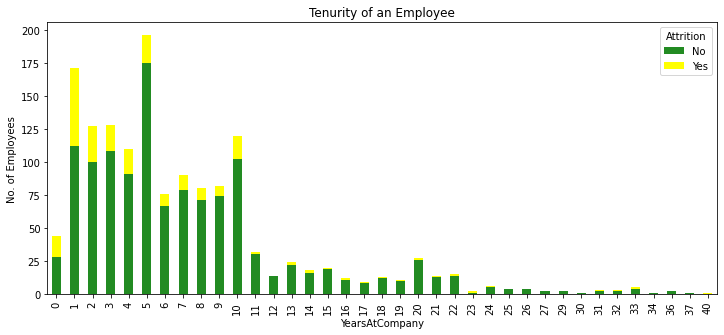

In [95]:
yrsAtComp = df.groupby("YearsAtCompany")['Attrition'].value_counts(normalize=False).unstack()

yrsAtComp.plot(kind='bar',figsize=(12,5), stacked='False', color=['#228B22','#FFFF00'])

mplt.title('Tenurity of an Employee')
mplt.ylabel('No. of Employees')
mplt.show()

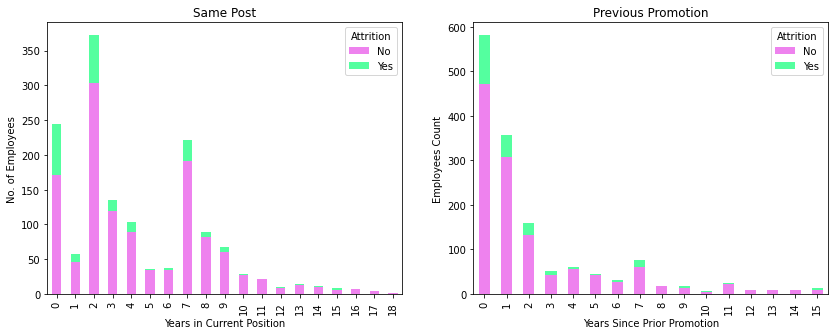

In [96]:
yrsInCrntRl = df.groupby("YearsInCurrentRole")['Attrition'].value_counts(normalize=False).unstack()
yrsSncLstPrm = df.groupby("YearsSinceLastPromotion")['Attrition'].value_counts(normalize=False).unstack()

shp = mplt.figure() # For making figure

y0 = shp.add_subplot(121) # For inserting subplot 1 (1 row, 2 columns, first plot)
y1 = shp.add_subplot(122) # For inserting subplot 2 (1 row, 2 columns, second plot).

# applying Box plot 
yrsInCrntRl.plot(kind='bar',figsize=(14,5), ax=y0, stacked='False',color=['#EE82EE','#54FF9F']) # add to subplot 1
y0.set_title('Same Post')
y0.set_xlabel('Years in Current Position')
y0.set_ylabel('No. of Employees')

# applying Line plot
yrsSncLstPrm.plot(kind='bar',figsize=(14,5), ax=y1, stacked='False',color=['#EE82EE','#54FF9F']) # add to subplot 2
y1.set_title ('Previous Promotion')
y1.set_ylabel('Employees Count')
y1.set_xlabel('Years Since Prior Promotion')

mplt.show()

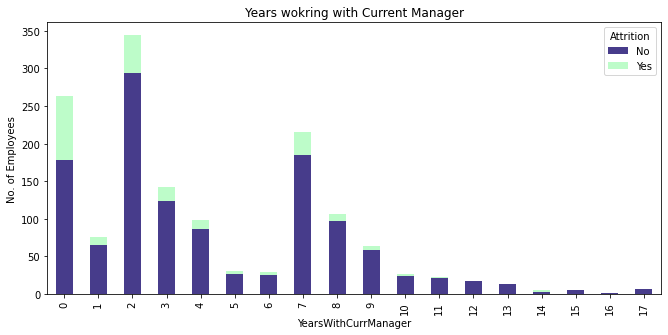

In [97]:
yrswtcrntmngr = df.groupby("YearsWithCurrManager")['Attrition'].value_counts(normalize=False).unstack()

yrswtcrntmngr.plot(kind='bar', stacked='False',figsize=(11,5),color=['#473C8B','#BDFCC9'])

mplt.title('Years wokring with Current Manager')
mplt.ylabel('No. of Employees')
mplt.show()

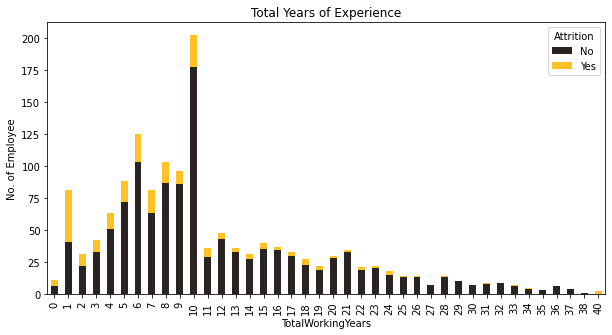

In [98]:
totlworknyrs = df.groupby("TotalWorkingYears")['Attrition'].value_counts(normalize=False).unstack()

totlworknyrs.plot(kind='bar', stacked='False',figsize=(10,5),color=['#292421','#FFC125'])

mplt.title('Total Years of Experience')
mplt.ylabel('No. of Employee')
mplt.show()

In [99]:
mntlyincm = df[df['Attrition']=='Yes']['MonthlyIncome']
mntlyincm = mntlyincm.reset_index()
mntlyincm.drop(['index'], axis=1, inplace=True)


mnthyno = df[df['Attrition']=='No']['MonthlyIncome']
mnthyno = mnthyno.reset_index()
mnthyno.drop(['index'], axis=1, inplace=True)

mntlyincm['mnthyno'] = mnthyno
mntlyincm.rename(columns={'MonthlyIncome':'Yes', 'mnthyno':'No'}, inplace=True)
mntlyincm.head()

,Yes,No
0,5993,5130
1,2090,2909
2,2028,3468
3,3407,3068
4,2960,2670


In [100]:
dptmnt = df[['Department','Attrition']]
dptmnt.head()

,Department,Attrition
0,Sales,Yes
1,Research & Development,No
2,Research & Development,Yes
3,Research & Development,No
4,Research & Development,No


In [101]:
dptmnt['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

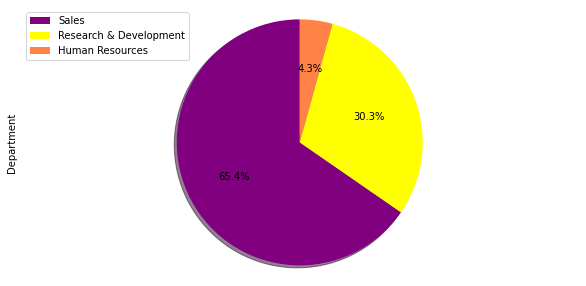

In [102]:
dptmnt['Department'].value_counts().plot(kind='pie',
                            figsize=(10, 5),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,
                            colors = ['#800080','#FFFF00','#FF8247'],      
                            labels=None)   
mplt.axis('equal') 
mplt.legend(labels=dptmnt['Department'].unique(), loc='upper left')

In [103]:
dptmnt = df.groupby("Department")['Attrition'].value_counts(normalize=False).unstack()
dptmnt = dptmnt.transpose()
dptmnt

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


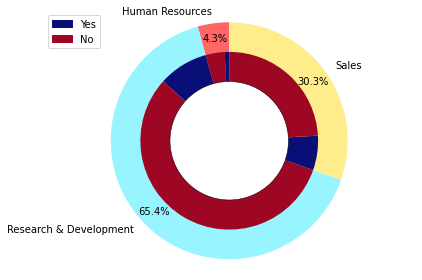

In [104]:
labels = ['Human Resources', 'Research & Development', 'Sales',]
sizes = [63, 961, 446]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [12,51,133,828,92,354]
colors = ['#ff6666', '#98F5FF', '#FFEC8B']

colors_attrition = ['#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723']
 
# Plot fuction
mplt.pie(sizes, autopct='%1.1f%%', pctdistance=.87, labels=labels, colors=colors, startangle=90,frame=True)
mplt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = mplt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = mplt.gcf()
fig6.gca().add_artist(centre_circle)

#legend fuction
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#0a0e77', label='Yes')
pin = mpatches.Patch(color='#9e0723', label='No')
mplt.legend(handles=[pur, pin], loc='upper left')

mplt.axis('equal')
mplt.tight_layout()
mplt.show()

In [105]:
gndranlys = df[['Gender', 'DistanceFromHome', 'Attrition']]
gndranlys.head()

,Gender,DistanceFromHome,Attrition
0,Female,1,Yes
1,Male,8,No
2,Male,2,Yes
3,Female,3,No
4,Male,2,No


In [106]:
gndranlys['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

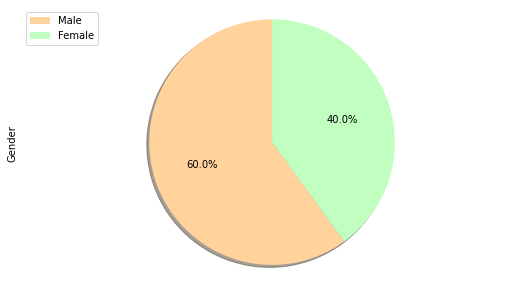

In [107]:
gndranlys['Gender'].value_counts().plot(kind='pie',
                            figsize=(9, 5),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,
                            colors = ['#FFD39B','#C1FFC1'],        
                            labels=None)   
mplt.axis('equal') 
mplt.legend(labels=['Male', 'Female'], loc='upper left')

In [108]:
mfa = gndranlys.groupby("Gender")['Attrition'].value_counts(normalize=False).unstack()
mfa = mfa.transpose()
mfa

Gender,Female,Male
Attrition,,
No,501,732
Yes,87,150


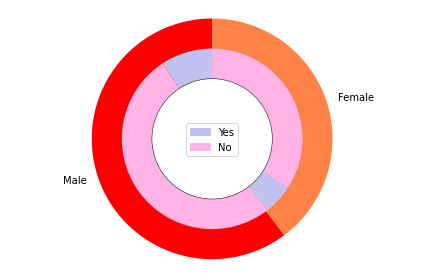

In [109]:
labels = ['Male', 'Female']
sizes = [872,576]
labels_attrition = ['Yes','No','Yes','No']
sizes_attrition = [130,722,77,481]
colors = ['#FF0000', '#FF8247']

colors_attrition = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
 
# Plot code
mplt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
mplt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = mplt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = mplt.gcf()
fig6.gca().add_artist(centre_circle)

#legend code
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#c2c2f0', label='Yes')
pin = mpatches.Patch(color='#ffb3e6', label='No')
mplt.legend(handles=[pur, pin], loc='center')

mplt.axis('equal')
mplt.tight_layout()
mplt.show()

In [110]:
mrgstat = df[['MaritalStatus', 'Attrition']]
mrgstat.head()

,MaritalStatus,Attrition
0,Single,Yes
1,Married,No
2,Single,Yes
3,Married,No
4,Married,No


In [111]:
mrgstat['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

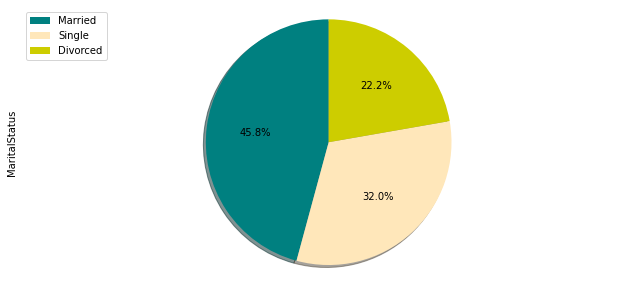

In [112]:
mrgstat['MaritalStatus'].value_counts().plot(kind='pie',
                            figsize=(11, 5),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True, 
                            colors = ['#008080', '#FFE7BA','#CDCD00'],     
                            labels=None)   
mplt.axis('equal') 
mplt.legend(labels=['Married', 'Single', 'Divorced'], loc='upper left')

In [113]:
mstatanlys = mrgstat.groupby("MaritalStatus")['Attrition'].value_counts(normalize=False).unstack()
mstatanlys = mstatanlys.transpose()
mstatanlys

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,294,589,350
Yes,33,84,120


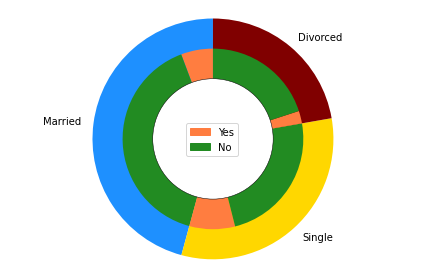

In [114]:
labels = ['Married', 'Single', 'Divorced']
sizes = [673, 470, 327]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [84,589,120,350,33,294]
colors = ['#1E90FF', '#FFD700', '#800000']

colors_attrition = ['#FF7D40','#228B22', '#FF7D40','#228B22', '#FF7D40','#228B22']
 
# For Plotting
mplt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
mplt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = mplt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = mplt.gcf()
fig6.gca().add_artist(centre_circle)

# code for legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#FF7D40', label='Yes')
pin = mpatches.Patch(color='#228B22', label='No')
mplt.legend(handles=[pur, pin], loc='center')

mplt.axis('equal')
mplt.tight_layout()
mplt.show()